In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.shape

(891, 12)

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.duplicated().sum()

0

In [15]:
df.groupby('Sex')['Age'].mean().reset_index()

,Sex,Age
0,female,27.915709
1,male,30.726645


In [16]:
#Filling the null values with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [17]:
df.drop('Cabin', axis=1,inplace=True)

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(889, 11)

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
gender = df['Sex'].value_counts()
gender

Sex
male      577
female    312
Name: count, dtype: int64

<Axes: xlabel='Sex'>

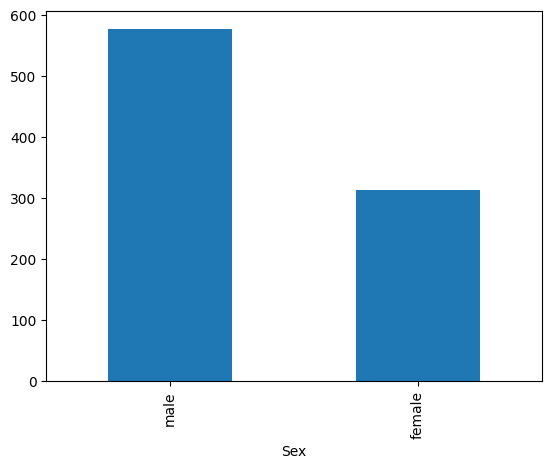

In [22]:
df['Sex'].value_counts().plot(kind = 'bar')

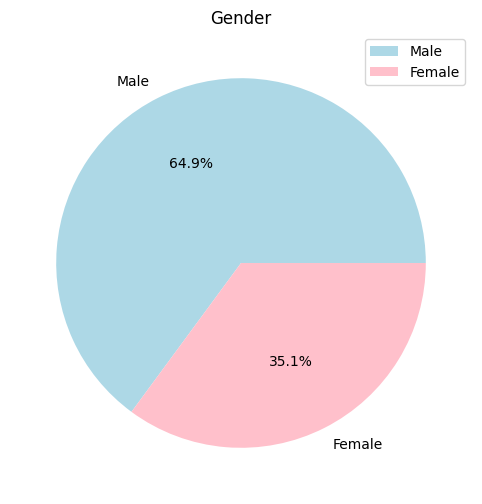

In [23]:
plt.figure(figsize=(10,6))
plt.pie(gender, labels=['Male', 'Female'] ,autopct='%.1f%%', colors=['lightblue','pink'])
plt.legend()
plt.title('Gender')
plt.show()

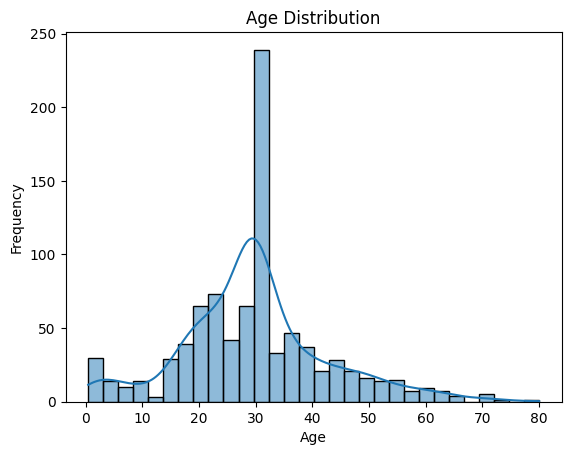

In [24]:
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [25]:
survived_sex = df[['Survived','Sex']].value_counts().reset_index()
survived_sex

,Survived,Sex,count
0,0,male,468
1,1,female,231
2,1,male,109
3,0,female,81


<Axes: xlabel='Survived,Sex'>

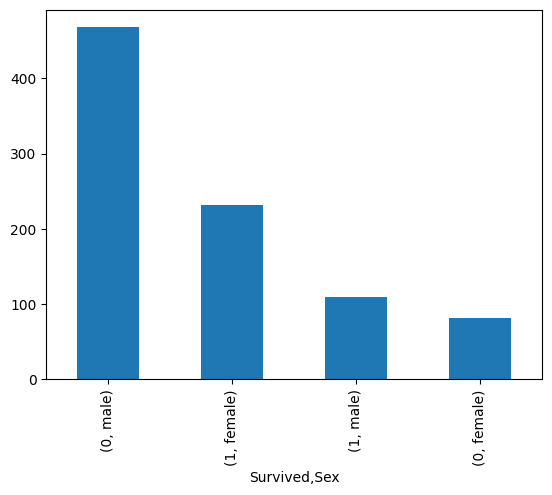

In [26]:
df[['Survived','Sex']].value_counts().plot(kind = 'bar')

In [27]:
df[['Embarked', 'Sex']].value_counts()

Embarked  Sex   
S         male      441
          female    203
C         male       95
          female     73
Q         male       41
          female     36
Name: count, dtype: int64

<Axes: ylabel='Embarked,Sex'>

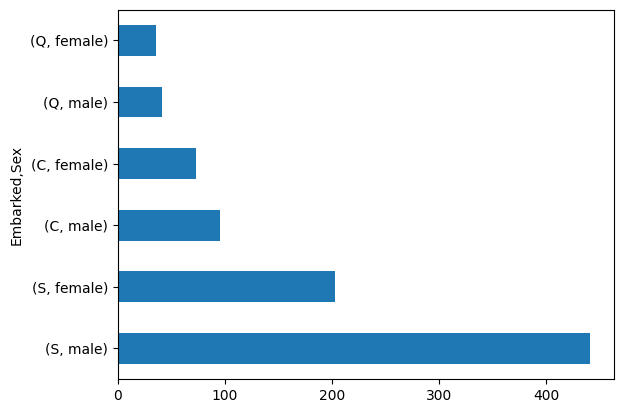

In [28]:
df[['Embarked', 'Sex']].value_counts().plot(kind = 'barh')

In [29]:
sv_em = df[['Survived', 'Embarked']].value_counts().reset_index()
sv_em

,Survived,Embarked,count
0,0,S,427
1,1,S,217
2,1,C,93
3,0,C,75
4,0,Q,47
5,1,Q,30


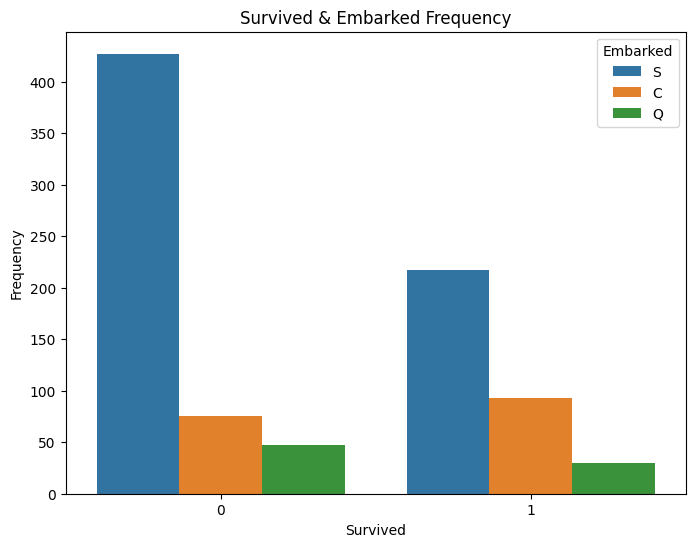

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(data=sv_em , x=sv_em['Survived'], y=sv_em['count'], hue=sv_em['Embarked'])
plt.title('Survived & Embarked Frequency')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

In [31]:
survived_class = df[['Survived', 'Pclass']].value_counts().reset_index()
survived_class

,Survived,Pclass,count
0,0,3,372
1,1,1,134
2,1,3,119
3,0,2,97
4,1,2,87
5,0,1,80


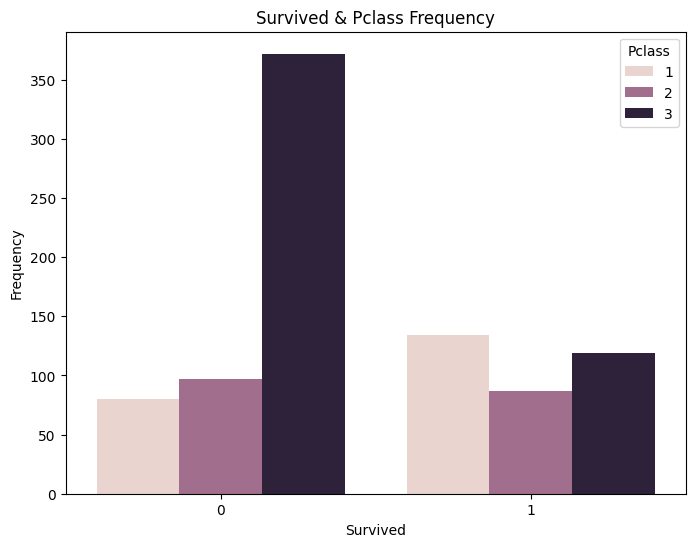

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(data=survived_class , x=survived_class['Survived'], y=survived_class['count'], hue=survived_class['Pclass'])
plt.title('Survived & Pclass Frequency')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

In [33]:
sibling = df['SibSp'].value_counts().reset_index()
sibling

,SibSp,count
0,0,606
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5


<Axes: xlabel='SibSp'>

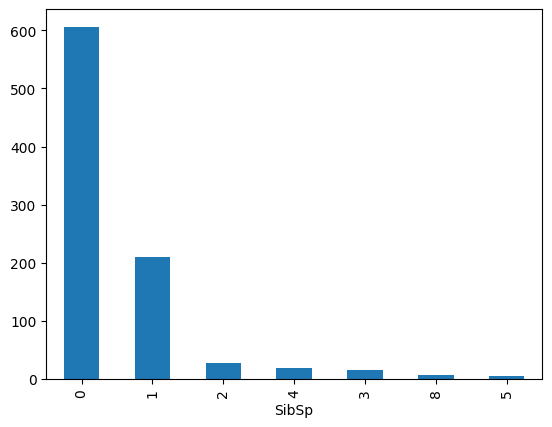

In [35]:
df['SibSp'].value_counts().plot(kind = 'bar')

In [36]:
survived_sibling = df[['Survived', 'SibSp']].value_counts().reset_index()
survived_sibling

,Survived,SibSp,count
0,0,0,398
1,1,0,208
2,1,1,112
3,0,1,97
4,0,2,15
5,0,4,15
6,1,2,13
7,0,3,12
8,0,8,7
9,0,5,5


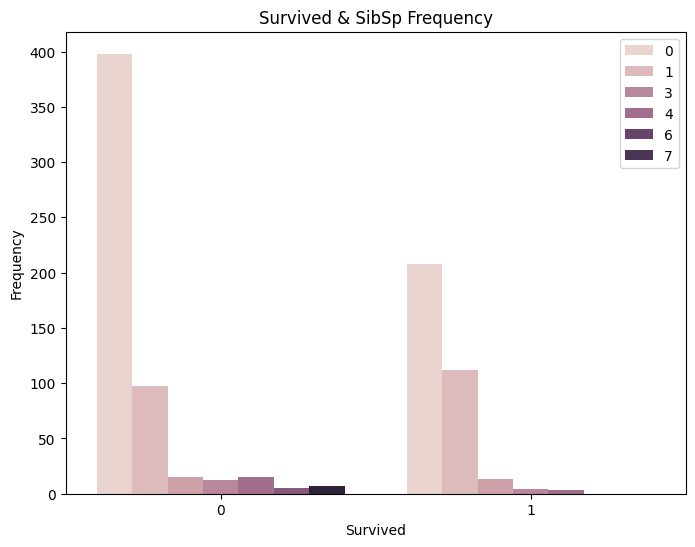

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(data=survived_sibling , x=survived_sibling['Survived'], y=survived_sibling['count'], hue=survived_sibling['SibSp'])
plt.title('Survived & SibSp Frequency')
plt.legend(loc='upper right')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

# MODEL BUILDING

In [38]:
data = df.drop(['PassengerId','Name','Ticket'], axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [40]:
label_encoder = LabelEncoder()

In [41]:
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [42]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [44]:
x= data.drop('Survived', axis=1)
y = data['Survived']

In [45]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [47]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [48]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [49]:
X_train, x_test, Y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [50]:
X_train.shape

(711, 7)

In [51]:
Y_train.shape

(711,)

In [52]:
x_test.shape

(178, 7)

In [53]:
y_test.shape

(178,)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [57]:
import warnings
warnings.filterwarnings('ignore')

## Logistic Regression

In [58]:
model1=LogisticRegression()
model1.fit(X_train,Y_train)

LogisticRegression()

In [59]:
y_pred = model1.predict(x_test)
accuracy_score(y_test,y_pred)

0.8426966292134831

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.80      0.80      0.80        71

    accuracy                           0.84       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.84      0.84      0.84       178



## Random Forest Classifier

In [61]:
model2 = RandomForestClassifier(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
model2.fit(X_train,Y_train)

RandomForestClassifier(max_depth=15, max_features=0.75, max_samples=0.5,
                       random_state=3)

In [62]:
y_pred = model2.predict(x_test)
accuracy_score(y_test,y_pred)

0.8595505617977528

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       107
           1       0.86      0.77      0.81        71

    accuracy                           0.86       178
   macro avg       0.86      0.85      0.85       178
weighted avg       0.86      0.86      0.86       178



## Decision Tree Classifier

In [64]:
model3 = DecisionTreeClassifier(max_depth=8)
model3.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=8)

In [65]:
y_pred = model3.predict(x_test)
accuracy_score(y_test,y_pred)

0.8539325842696629

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       107
           1       0.86      0.76      0.81        71

    accuracy                           0.85       178
   macro avg       0.85      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



## SVC

In [67]:
from sklearn.svm import SVC

In [69]:
model4 = SVC(kernel = 'linear',random_state = 0)
model4.fit(X_train,Y_train)

SVC(kernel='linear', random_state=0)

In [70]:
y_pred = model4.predict(x_test)
accuracy_score(y_test,y_pred)

0.8370786516853933

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       107
           1       0.81      0.77      0.79        71

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



## KNN

In [72]:
model5 = KNeighborsClassifier(n_neighbors=3)
model5.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [73]:
y_pred = model5.predict(x_test)
accuracy_score(y_test,y_pred)

0.7191011235955056

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       107
           1       0.67      0.59      0.63        71

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178



Random Forest is the best performing classifier with the accuracy of 85.9%